# Pendahuluan

Dari data yang diberikan :

1. Data hypothesis, berisi daftar hipotesis dan skornya berdasarkan parameter reach, impact, confidence dan effort.

2. Data orders, berisi data penjualan yang dihasilkan tiap kelompok.

3. Data visits, berisi data jumlah kunjungan tiap kelompok.

Akan digunakan untuk :

 1. Menentukan prioritas hipotesis berdasarkan framework ICE dan RICE.

 2. Melakukan pengujian A/B testing.

 3. Membuat keputusan atas kesimpulan dari pengujian A/B testing.



# Inisialisasi

In [1]:
# Memuat library
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
# Menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Lebar kolom max
pd.set_option('display.max_colwidth', None)

# Memuat data

In [3]:
try :
    hypothesis = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 8\File\hypotheses_us.csv', sep=';')
    orders = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 8\File\orders_us.csv')
    visits = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 8\File\visits_us.csv')

except :
    hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')
    

# Memeriksa, optimalisasi dan memperbaiki data

In [4]:
# Fungsi untuk memeriksa data

def check(file) :
    na = file.isna().sum().sum()
    dup = file.duplicated().sum()
    print('Data memiliki baris dan kolom :', file.shape)
    print()
    if na > 0 :
        print('Data memiliki nilai yang hilang pada kolom :')
        print(file.isna().sum())
    else :
        print('Tidak terdapat nilai yang hilang pada data')
    print()
    if dup > 0 :
        print('Data memiliki duplikat eksplisit sebesar', dup, 'baris')
    else : 
        print('Tidak terdapat duplikat eksplisit dalam data')
    print()
    print(file.info(memory_usage='deep'))
    print()
    print(file.describe())
    print()
    print(file.head())

Membuat fungsi untuk memeriksa data yang akan digunakan secara berulang.

## hypothesis

### Memeriksa data

In [5]:
check(hypothesis)

Data memiliki baris dan kolom : (9, 5)

Tidak terdapat nilai yang hilang pada data

Tidak terdapat duplikat eksplisit dalam data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB
None

           Reach     Impact  Confidence     Effort
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   5.000000
75%     8.000000   7.000000    8.000000   6.000000
max    10.000000  10.000000

**Informasi yang terdapat pada data :**

`Hypothesis` — Deskripsi singkat tentang hipotesis.

`Reach` — Jangkauan pengguna, dalam skala satu hingga sepuluh.

`Impact` — Dampak terhadap pengguna, dalam skala satu hingga sepuluh.

`Confidence` — Keyakinan pada hipotesis, dalam skala satu sampai sepuluh.

`Effort` — Sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh.

**Masalah yang terdapat pada data :**

 1. Nama kolom tidak ditulis dengan gaya snake_case.

### Memperbaiki data

**1. Merubah nama kolom menjadi lowercase**

In [6]:
# Rubah nama kolom
hypothesis.columns = hypothesis.columns.str.lower()

In [7]:
# Cek perubahan nama kolom
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Nama kolom sudah berubah menjadi lowercase.

### Ringkasan

In [8]:
hypothesis.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


Besaran data tidak berubah.

**Informasi yang terdapat pada data :**

`hypothesis` — Deskripsi singkat tentang hipotesis.

`reach` — Jangkauan pengguna, dalam skala satu hingga sepuluh.

`impact` — Dampak terhadap pengguna, dalam skala satu hingga sepuluh.

`confidence` — Keyakinan pada hipotesis, dalam skala satu sampai sepuluh.

`effort` — Sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh.

**Perbaikan yang dilakukan pada data :**
1. Merubah nama kolom menjadi lowercase.

## orders

### Memeriksa data

In [9]:
check(orders)

Data memiliki baris dan kolom : (1197, 5)

Tidak terdapat nilai yang hilang pada data

Tidak terdapat duplikat eksplisit dalam data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB
None

       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03   1197.000000
mean    2.155621e+09  2.165960e+09    131.491646
std     1.229085e+09  1.236014e+09    603.004729
min     1.062393e+06  5.114589e+06      5.000000
25%     1.166776e+09  1.111826e+09     20.800000
50%     2.145194e+09  2.217985e+09     50.200000
75%     3.237740e+09  3.177606e+09    130

In [10]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

**Informasi yang terdapat pada data :**

`transactionId` — ID pesanan.

`visitorId` — ID pengguna.

`date` — tanggal dibuatnya pesanan.

`revenue` — pendapatan dari pesanan.

`group` — kelompok A/B. 



**Masalah yang terdapat pada data :**
 1. Format kolom `date` object dapat di optimalisasi menjadi datetime.
 2. Penulisan nama kolom tidak snake_case.
 

### Optimalisasi data

In [11]:
try :
    orders = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 8\File\orders_us.csv',
                        parse_dates=['date'])

except :
    orders = pd.read_csv('/datasets/orders_us.csv',
                        parse_dates=['date'])

In [12]:
# Cek data
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


Besaran data berubah dari 174,3 KB menjadi 105,3 KB.

**Optimalisasi pada data :**
 1. Format kolom `date` menjadi datetime.

### Memperbaiki data

**Merubah nama kolom menjadi lowercase.**

In [13]:
orders.columns = orders.columns.str.lower()

In [14]:
# Cek perubahan
orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

Nama kolom sudah berubah menjadi lowercase.

### Ringkasan

In [15]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


Besaran data berubah dari 174,3 KB menjadi 38,9 KB.

**Informasi yang terdapat pada data :**

`transactionid` — ID pesanan.

`visitorid` — ID pengguna.

`date` — tanggal dibuatnya pesanan.

`revenue` — pendapatan dari pesanan.

`group` — kelompok A/B. 

**Optimalisasi pada data :**
 1. Format kolom `date` menjadi datetime.

**Perbaikan yang dilakukan pada data :**
 1. Merubah nama kolom menjadi lowercase.


## visits

### Memeriksa data

In [16]:
check(visits)

Data memiliki baris dan kolom : (62, 3)

Tidak terdapat nilai yang hilang pada data

Tidak terdapat duplikat eksplisit dalam data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB
None

           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


**Informasi yang terdapat pada data :**

`date` — Tanggal

`group` — Kelompok A/B.

`visits` — Jumlah kunjungan.

**Masalah yang terdapat pada data :**

1. Format kolom `date` object dapat dioptimalisasi menjadi datetime.

### Optimalisasi data

In [17]:
try :
    visits = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 8\File\visits_us.csv',
                        parse_dates=['date'])

except :
    visits = pd.read_csv('/datasets/visits_us.csv',
                        parse_dates=['date'])

In [18]:
# Cek data
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


Besaran data berubah dari 8,2 KB menjadi 4,6 KB.

**Optimalisasi pada data :**
 1. Format kolom `date` menjadi datetime.

### Ringkasan

In [19]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


Besaran data berubah dari 8,2 KB menjadi 4,6 KB.

**Informasi yang terdapat pada data :**

`date` — Tanggal

`group` — Kelompok A/B.

`visits` — Jumlah kunjungan.

**Optimalisasi pada data :**
 1. Format kolom `date` menjadi datetime.


# Prioritas hipotesis

In [20]:
# Menambahkan nomor hypothesis
hypothesis.insert(loc=0, column='hypothesis_no', value='hypothesis_' + (hypothesis.index + 1).astype('str'))

Untuk mempermudah analisa ditambahkan nomor hypothesis.

## Framework ICE

In [21]:
# Menghitung skor ICE
hypothesis['ICE'] =round((hypothesis['impact']*hypothesis['confidence']) / hypothesis['effort'],2)

In [22]:
# Mengurutkan prioritas hipotesis ICE
hypothesis[['hypothesis_no', 'hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,hypothesis_no,hypothesis,ICE
8,hypothesis_9,Launch a promotion that gives users discounts on their birthdays,16.20
0,hypothesis_1,Add two new channels for attracting traffic. This will bring 30% more users,13.33
7,hypothesis_8,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20
6,hypothesis_7,Show banners with current offers and sales on the main page. This will boost conversion,8.00
2,hypothesis_3,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.00
1,hypothesis_2,Launch your own delivery service. This will shorten delivery time,2.00
5,hypothesis_6,Add a customer review page. This will increase the number of orders,1.33
3,hypothesis_4,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.12
4,hypothesis_5,Change the background color on the main page. This will increase user engagement,1.00


Berdasarkan skor ICE 5 prioritas hipotesis tertinggi dengan urutan : 
1. hypothesis_9, Launch a promotion that gives users discounts on their birthdays.
2. hypothesis_1, Add two new channels for attracting traffic. This will bring 30% more users.
3. hypothesis_8, Add a subscription form to all the main pages. This will help you compile a mailing list.
4. hypothesis_7, Show banners with current offers and sales on the main page. This will boost conversion.
5. hypothesis_3, Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.

## Framework RICE

In [23]:
# Menghitung skor RICE
hypothesis['RICE'] = round((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']) / hypothesis['effort'], 2)

In [24]:
# Mengurutkan prioritas hipotesis RICE
hypothesis[['hypothesis_no', 'hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,hypothesis_no,hypothesis,RICE
7,hypothesis_8,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,hypothesis_3,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,hypothesis_1,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,hypothesis_7,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,hypothesis_9,Launch a promotion that gives users discounts on their birthdays,16.2
3,hypothesis_4,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,hypothesis_2,Launch your own delivery service. This will shorten delivery time,4.0
5,hypothesis_6,Add a customer review page. This will increase the number of orders,4.0
4,hypothesis_5,Change the background color on the main page. This will increase user engagement,3.0


Berdasarkan skor RICE prioritas hipotesis tertinggi dengan urutan :

1. hypothesis_8, Add a subscription form to all the main pages. This will help you compile a mailing list.
2. hypothesis_3, Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
3. hypothesis_1, Add two new channels for attracting traffic. This will bring 30% more users.
4. hypothesis_7, Show banners with current offers and sales on the main page. This will boost conversion.
5. hypothesis_9, Launch a promotion that gives users discounts on their birthdays.	

## Perbandingan skor ICE dan RICE

In [25]:
# Membandingkan komponen dari skor ICE dan RICE
hypothesis.drop('hypothesis', axis=1).sort_values('RICE', ascending=False)

,hypothesis_no,reach,impact,confidence,effort,ICE,RICE
7,hypothesis_8,10,7,8,5,11.20,112.0
2,hypothesis_3,8,3,7,3,7.00,56.0
0,hypothesis_1,3,10,8,6,13.33,40.0
6,hypothesis_7,5,3,8,3,8.00,40.0
8,hypothesis_9,1,9,9,5,16.20,16.2
3,hypothesis_4,8,3,3,8,1.12,9.0
1,hypothesis_2,2,5,4,10,2.00,4.0
5,hypothesis_6,3,2,2,3,1.33,4.0
4,hypothesis_5,3,1,1,1,1.00,3.0


hypothesis_8 memiliki skor RICE tertinggi yang disebabkan skor reach tinggi dan skor effort sedang. hypothesis_9 memiliki skor ICE tertinggi namun tidak menjadi prioritas tertinggi pada framework RICE yang disebabkan skor reach yang rendah walaupun hipotesis ini memiliki skor impact dan confidence yang tinggi.

## Kesimpulan

Berdasarkan skor RICE 5 prioritas hipotesis tertinggi dengan urutan :

1. hypothesis_8, Add a subscription form to all the main pages. This will help you compile a mailing list.
2. hypothesis_3, Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
3. hypothesis_1, Add two new channels for attracting traffic. This will bring 30% more users.
4. hypothesis_7, Show banners with current offers and sales on the main page. This will boost conversion.
5. hypothesis_9, Launch a promotion that gives users discounts on their birthdays.	

Berdasarkan skor ICE 5 prioritas hipotesis tertinggi dengan urutan : 

1. hypothesis_9, Launch a promotion that gives users discounts on their birthdays.
2. hypothesis_1, Add two new channels for attracting traffic. This will bring 30% more users.
3. hypothesis_8, Add a subscription form to all the main pages. This will help you compile a mailing list.
4. hypothesis_7, Show banners with current offers and sales on the main page. This will boost conversion.
5. hypothesis_3, Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.

hypothesis_8 memiliki skor RICE tertinggi yang disebabkan skor reach tinggi dan skor effort sedang. hypothesis_9 memiliki skor ICE tertinggi namun tidak menjadi prioritas tertinggi pada framework RICE yang disebabkan skor reach yang rendah walaupun hipotesis ini memiliki skor impact dan confidence yang tinggi.

# A/B Testing

## Pendapatan kumulatif kelompok

In [26]:
# Mengelompokkan data berdasarkan group dan date
groupdate = orders[['group', 'date']].drop_duplicates()

In [27]:
# Agregat revenue berdasarkan groupdate
ordersagg = groupdate.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                            .agg({'date':'max', 'group':'max', 'transactionid':'nunique',
                                  'visitorid':'nunique', 'revenue':'sum'}), axis=1)


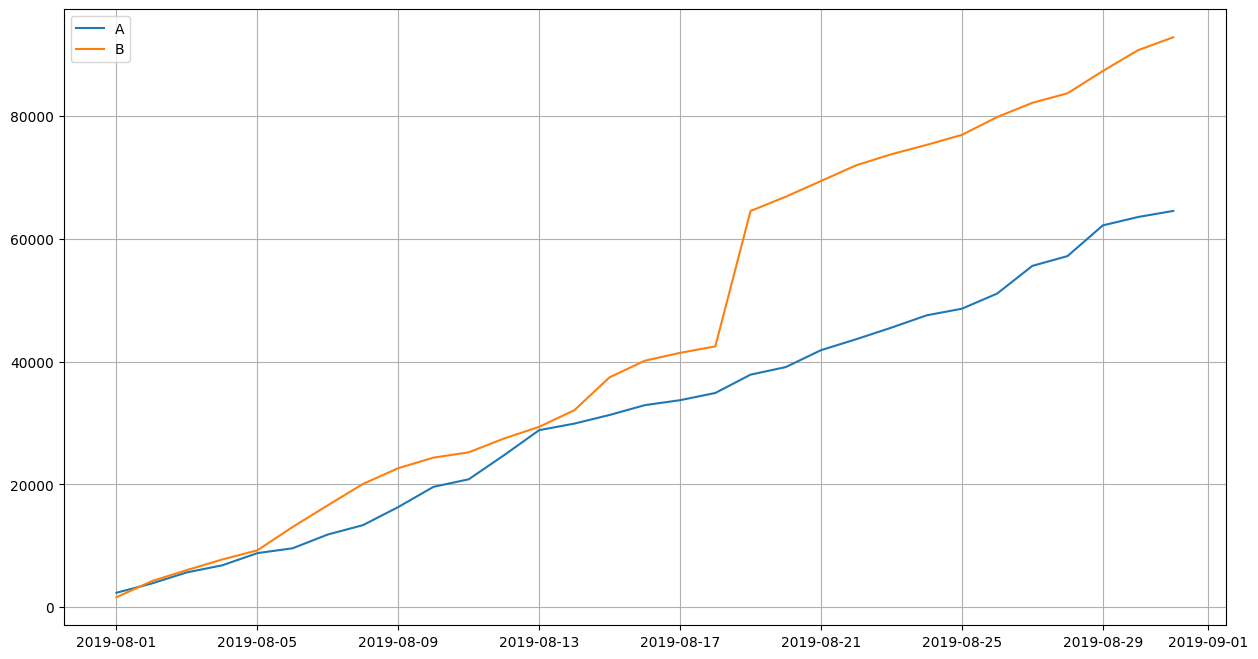

In [28]:
# Irisan data revenue per group
cumulativerevenueA= ordersagg.query('group == "A"')[['date','revenue','transactionid']].sort_values('date')
cumulativerevenueB= ordersagg.query('group == "B"')[['date','revenue','transactionid']].sort_values('date')

# Grafik garis revenue A dan B
plt.figure(figsize=(15,8))
plt.plot(cumulativerevenueA['date'], cumulativerevenueA['revenue'], label='A')
plt.plot(cumulativerevenueB['date'], cumulativerevenueB['revenue'], label='B')
plt.legend()
plt.grid()

Group B mulai memimpin pada tanggal 2019-08-02 dan terus bertahan. Terdapat lonjakan penjualan yang tinggi di grup B pada tanggal 2019-08-19. Kemungkinan terdapat pesanan dalam jumlah yang besar.

Pendapatan kumulatif group B sebesar 92.840 lebih besar dari group A sebesar 64.555.

## Pendapatan rata-rata kumulatif kelompok

In [29]:
# Menghitung pendapatan rata-rata per transaksi
cumulativerevenueA['avg_revenue'] = cumulativerevenueA['revenue'] / cumulativerevenueA['transactionid']
cumulativerevenueB['avg_revenue'] = cumulativerevenueB['revenue'] / cumulativerevenueB['transactionid']

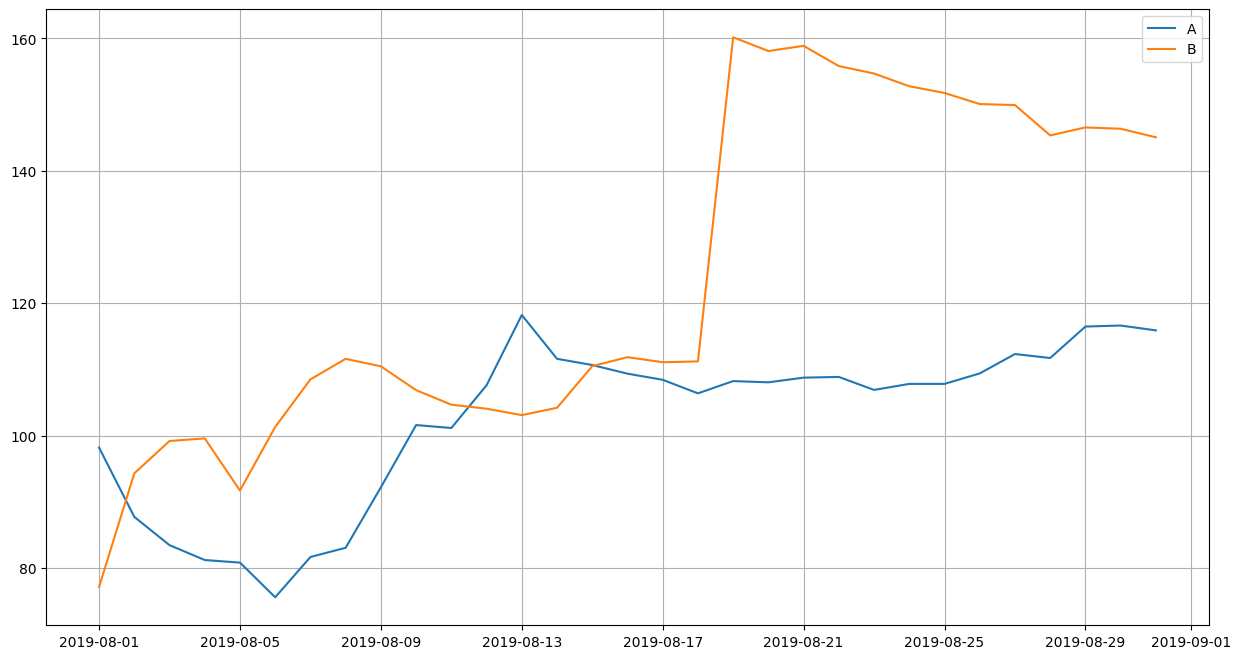

In [30]:
# Grafik garis rata-rata pendapatan
plt.figure(figsize=(15,8))
plt.plot(cumulativerevenueA['date'], cumulativerevenueA['avg_revenue'], label='A')
plt.plot(cumulativerevenueB['date'], cumulativerevenueB['avg_revenue'], label='B')
plt.legend()
plt.grid()

Pendapatan rata-rata group B mulai memimpin pada tanggal 2019-08-02 dan terdapat lonjakan yang tinggi pada tanggal 2019-08-19.

Pendapatan rata-rata group A tertinggi pada tanggal 2019-08-13 dan seterusnya mengalami penurunan.

Pada akhir periode, pendapatan rata-rata group B sebesar 145 dan group A sebesar 116.

## Perbedaan relatif pendapatan rata-rata kumulatif kelompok

In [31]:
# Menggabungkan data cumulative revenue
cumulativerevenue = cumulativerevenueA.merge(cumulativerevenueB, left_on='date', right_on='date', how='left',
                                            suffixes=['A','B'])

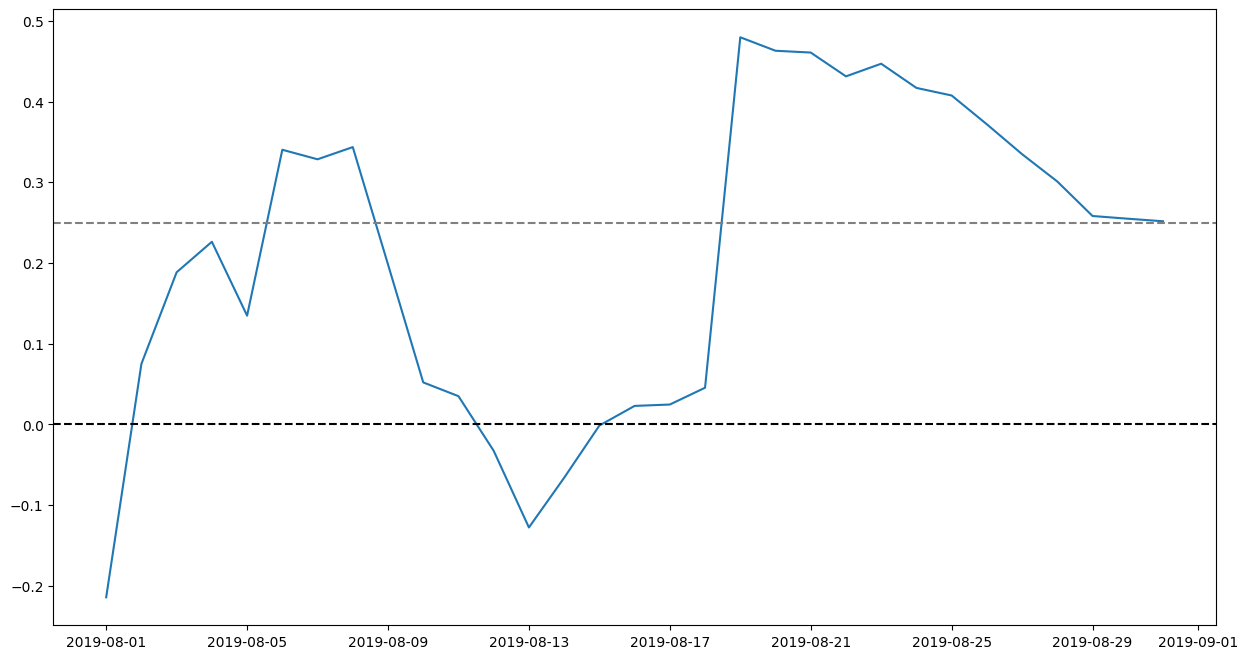

In [32]:
# Menghitung perbedaan relatif rata-rata pendapatan
cumulativerevenue['avg_revenue_diff'] = (cumulativerevenue['avg_revenueB'] / cumulativerevenue['avg_revenueA'])-1

# Grafik Garis
plt.figure(figsize=(15,8))
plt.plot(cumulativerevenue['date'], cumulativerevenue['avg_revenue_diff'])

# Menambah sumbu X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='grey', linestyle='--')


Group B mulai memimpin pada tanggal 2019-08-02 dan mengalami kenaikan dan penurunan sampai tanggal 2019-08-08 lalu mengalami penurunan tajam sampai tanggal 2019-08-13, setelah itu group B mulai mengalami kenaikan sampai titik tertinggi pada tanggal 2019-08-19 dan terus memimpin. Pada akhir periode pendapatan rata-rata kumulatif group B 25% diatas group A.

## Tingkat konversi kumulatif kelompok

In [33]:
# Agregat jumlah visits berdasarkan groupdate
visitsagg = groupdate.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                            .agg({'date':'max', 'group':'max', 'visits':'sum'}), axis=1)


In [34]:
# Menggabungkan visitagg dengan ordersagg
cumulativedata = ordersagg.merge(visitsagg, left_on=['date', 'group'], right_on=['date','group'], how='left')

In [35]:
# Menghitung tingkat konversi
cumulativedata['conversion_rate'] = cumulativedata['transactionid'] / cumulativedata['visits']

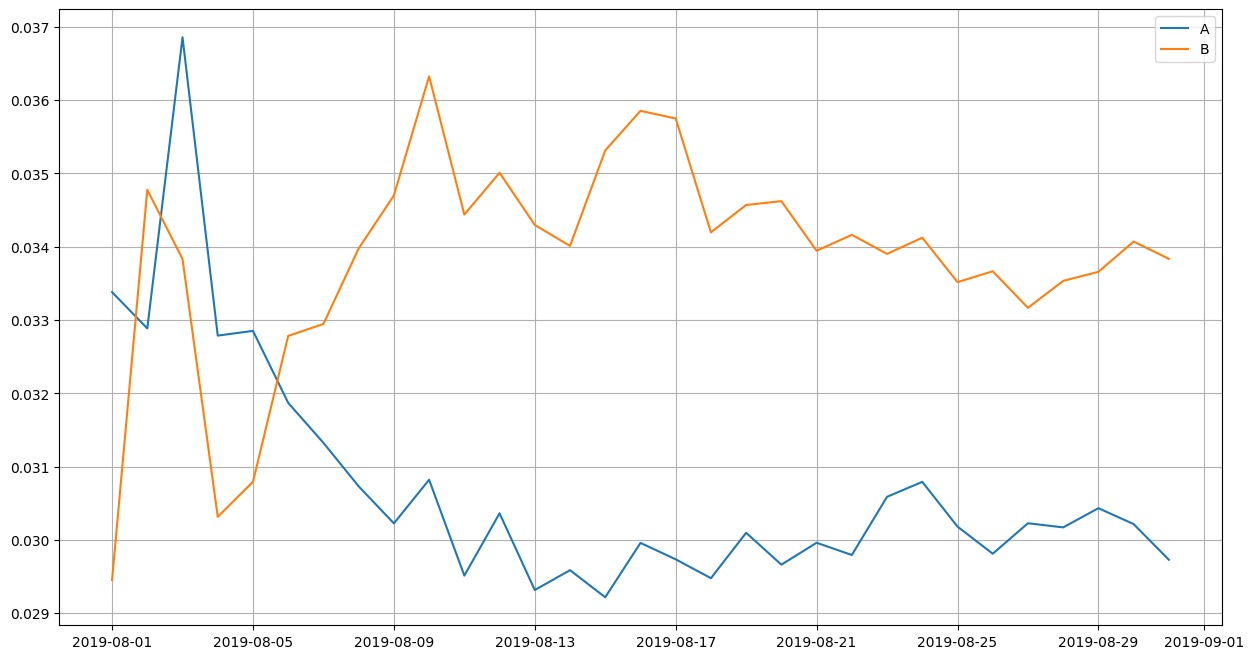

In [36]:
# Mengiris data per kelompok
cumulativedataA = cumulativedata.query('group == "A"').sort_values('date')
cumulativedataB = cumulativedata.query('group == "B"').sort_values('date')

# Grafik garis
plt.figure(figsize=(15,8))
plt.plot(cumulativedataA['date'], cumulativedataA['conversion_rate'], label='A')
plt.plot(cumulativedataB['date'], cumulativedataB['conversion_rate'], label='B')
plt.grid()
plt.legend()

Pada awalnya group A memiliki tingkat konversi yang lebih tinggi, sampai tingkat konversi tertinggi pada tanggal 2019-08-03 lalu mengalami penurunan seterusnya.

Tingkat konversi group B mulai menyusul group A pada tanggal 2019-08-06 sampai tingkat konversi tertinggi pada tanggal 2019-08-10 dan terus memimpin.

Tingkat konversi group B pada awalnya sebesar 2,9% dan pada akhir periode sebesar 3,4%, group B mengalami peningkatan.

Tingkat konversi group A pada awalnya sebesar 3,3% dan pada akhir periode sebesar 3%, group A mengalami penurunan.

## Perbedaan relatif tingkat konversi kelompok

In [37]:
# Membuat tabel perbandingan tingkat konversi
conversion = cumulativedata.pivot_table(index='date', columns='group', 
                                        values='conversion_rate', aggfunc='mean').reset_index()

# Ganti nama kolom
conversion.columns = ['date', 'conv_rateA', 'conv_rateB']

# Menghitung perbedaan conversion rate
conversion['conv_diff'] = (conversion['conv_rateB'] / conversion['conv_rateA']) - 1

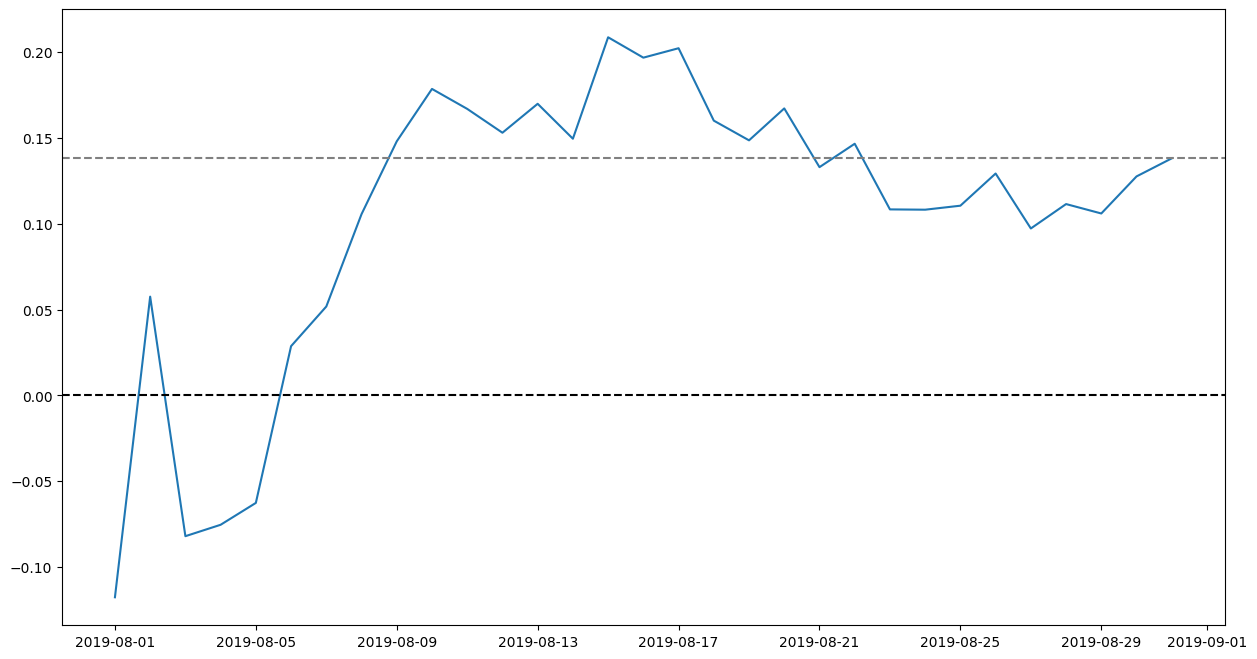

In [38]:
plt.figure(figsize=(15,8))
plt.plot(conversion['date'], conversion['conv_diff'])
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.138, color='grey', linestyle='--')

Tingkat konversi group B terus mengalami peningkatan dan pada akhir periode tingkat konversi group B 14% lebih tinggi dari group A.

## Pesanan per pengguna

In [39]:
# Membuat tabel order per user
orderperuser = orders[['visitorid','transactionid']].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})

# Ganti nama kolom
orderperuser.columns = ['visitorid', 'n_order']

array([[<Axes: title={'center': 'n_order'}>]], dtype=object)

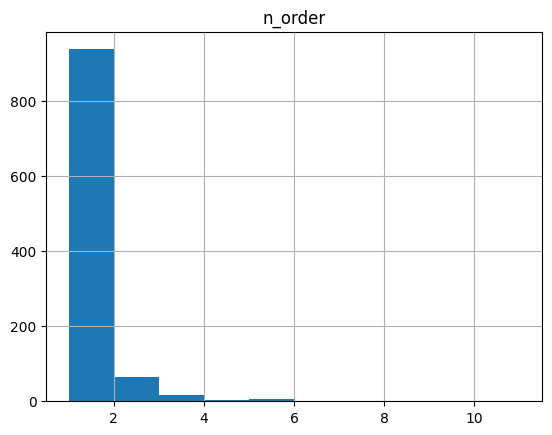

In [40]:
# Grafik histogram
orderperuser.hist('n_order')

Jumlah pesanan per pengguna paling banyak di range 1-2 pesanan.

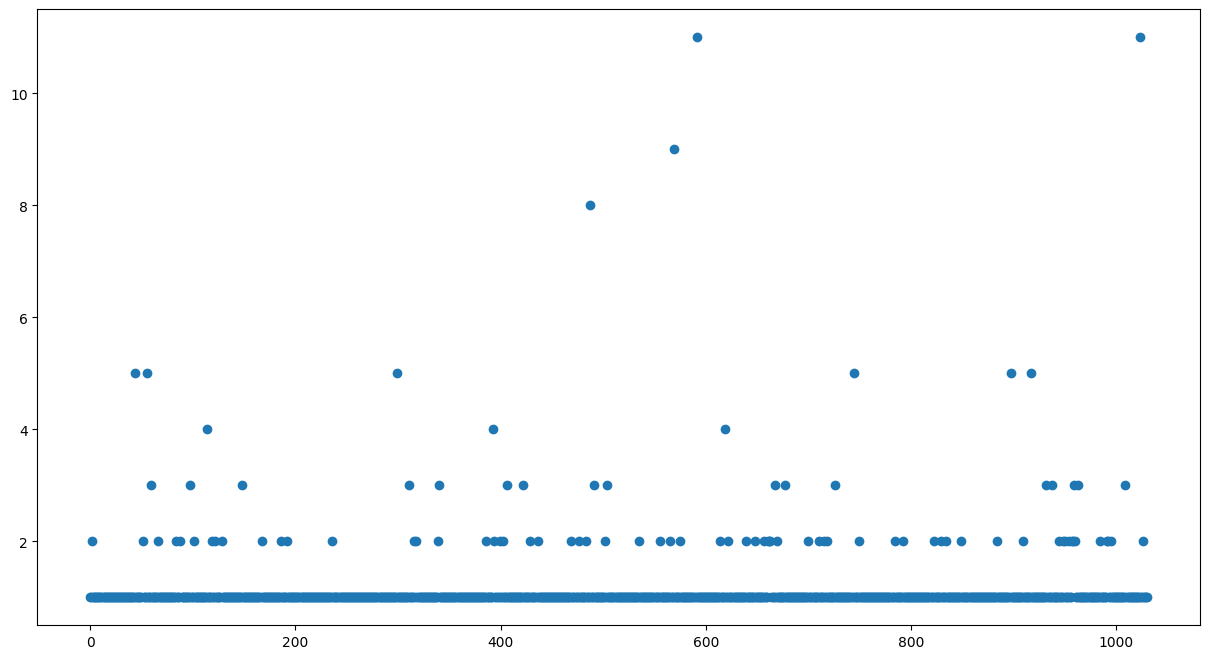

In [41]:
# Membuat sumbu x
x = pd.Series(range(0,len(orderperuser)))

# Grafik scatterplot
plt.figure(figsize=(15,8))
plt.scatter(x, orderperuser['n_order'])

Terdapat pesanan per pengguna diatas 2, namun jumlah pesanan diatas 2 per pengguna sedikit.

In [42]:
# Persentil ke-95 dan ke-99 pesanan per pengguna
print(np.percentile(orderperuser['n_order'],[95,99]))

[2. 4.]


Pesanan per pengguna lebih dari 2 tidak melampaui 5% dan pesanan lebih dari 4 hanya berjumlah 1% dari total baris data.

## Pendapatan

array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

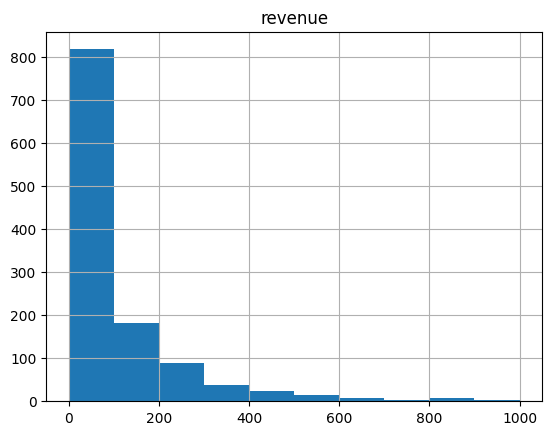

In [43]:
# Grafik histogram pendapatan
orders.hist('revenue', range=(0,1000))

Pendapatan per transaksi paling banyak di range 0-200.

(0.0, 1500.0)

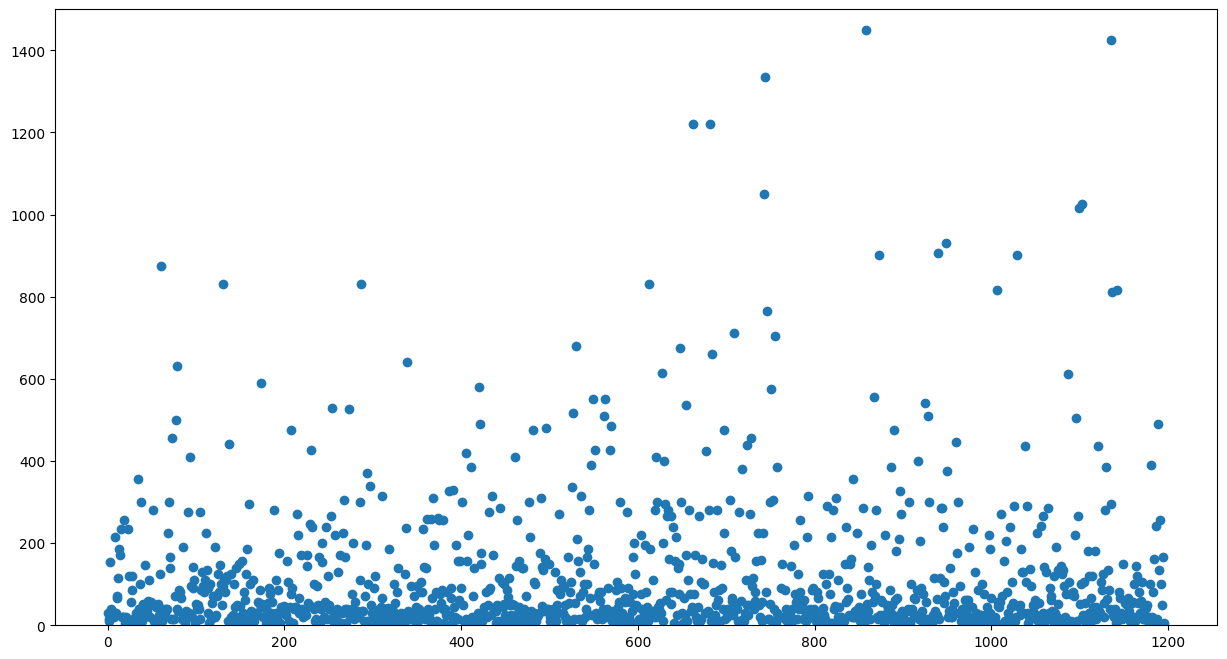

In [44]:
# Membuat sumbu x
x1 = pd.Series(range(0,len(orders)))

# Grafik scatterplot
plt.figure(figsize=(15,8))
plt.scatter(x1, orders['revenue'])
plt.ylim(0,1500)

Terdapat pendapatan per transaksi diatas 400, namun jumlahnya sedikit.

In [45]:
# Persentil ke-95 dan ke-99 pendapatan per transaksi
print(np.percentile(orders['revenue'],[95,99]))

[435.54  900.904]


Pendapatan per transaksi diatas 435 tidak melebihi 5% dan diatas 900 tidak melebihi 1% dari total baris data.

## Signifikansi statistik perbedaan konversi antar kelompok data mentah

In [46]:
# Irisan data jumlah transaksi A dan B
ordersA = orders.query('group =="A"').groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersB = orders.query('group =="B"').groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})

# Jumlah total visits group A dan B
visitsA = visits.query('group =="A"')['visits'].sum()
visitsB = visits.query('group =="B"')['visits'].sum()

# Membuat data series dengan nilai 0 untuk user yang tidak melakukan transaksi
seriesA = pd.Series(0, index = np.arange(visitsA - len(ordersA['transactionid'])))
seriesB = pd.Series(0, index = np.arange(visitsB - len(ordersB['transactionid'])))

# Membuat data sample A dan B
sampleA = pd.concat([ordersA['transactionid'], seriesA])
sampleB = pd.concat([ordersB['transactionid'], seriesB])


Dari dataset akan diuji hipotesis :

H0 : Konversi kelompok tidak berbeda signifikan secara statistik.

Ha : Konversi kelompok berbeda signifikan secara statistik.

In [47]:
# Pengujian hipotesis
pvalue_conv = stats.mannwhitneyu(sampleA, sampleB)[1]
diff_conv = (sampleB.mean() / sampleA.mean()) -1

alpha = 0.05

print('pvalue :', '{0:.5f}'.format(pvalue_conv))

if pvalue_conv < alpha :
    print('Kita menolak hipotesis nol')
else :
    print('Kita tidak menolak hipotesis nol')

print()
print('Perbedaan relatif :', '{0:.3f}'.format(diff_conv))

pvalue : 0.01679
Kita menolak hipotesis nol

Perbedaan relatif : 0.138


Konversi kelompok berbeda signifikan secara statistik. Perbedaan konversi relatif B terhadap A adalah 13,8%.

## Signifikansi statistik perbedaan ukuran pendapatan rata-rata antar kelompok data mentah

Dari dataset akan diuji hipotesis :

H0 : Pendapatan rata-rata kelompok tidak berbeda signifikan secara statistik.

Ha : Pendapatan rata-rata kelompok berbeda signifikan secara statistik.

In [48]:
# Irisan data pendapatan kelompok
revenueA = orders.query('group == "A"')['revenue']
revenueB = orders.query('group == "B"')['revenue']


In [49]:
# Pengujian hipotesis
pvalue_rev = stats.mannwhitneyu(revenueA, revenueB)[1]
diff_rev = (revenueB.mean() / revenueA.mean()) -1

alpha = 0.05

print('pvalue :', '{0:.5f}'.format(pvalue_rev))

if pvalue_rev < alpha :
    print('Kita menolak hipotesis nol')
else :
    print('Kita tidak menolak hipotesis nol')

print()
print('Perbedaan relatif :', '{0:.3f}'.format(diff_rev))

pvalue : 0.69152
Kita tidak menolak hipotesis nol

Perbedaan relatif : 0.252


Pendapatan rata-rata kelompok tidak berbeda signifikan secara statistik. Perbedaan relatif sebesar 25,2%.

## Menentukan filter data

Pada bab **6.6** diketahui untuk persentil data ke-95 dan ke-99 adalah 2 dan 4 pesanan.

Pada bab **6.7** diketahui untuk persentil data pendapatan ke-95 dan ke-99 adalah 435 dan 900.

Para pengguna (`visitorid`) yang melakukan pembelian diatas 2 pesanan dengan nilai diatas 900 akan digolongkan sebagai anomali.

In [50]:
# Membuat irisan data visitorid anomali
visitorA = ordersA.query('transactionid > 2')
visitorB = ordersB.query('transactionid > 2')
high_revenue_visitor = orders.query('revenue > 900')

# Membuat list visitorid anomali
marked_visitorid = pd.concat([visitorA['visitorid'], visitorB['visitorid']])
marked_visitorid = pd.concat([marked_visitorid, high_revenue_visitor['visitorid']]).drop_duplicates()

In [51]:
# Cek list marked_visitorid
marked_visitorid.head()

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: visitorid, dtype: int64

List marked_visitorid sudah berisi visitorid yang digolongkan sebagai anomali.

## Signifikansi statistik perbedaan konversi antar kelompok data terfilter

In [52]:
# Irisan data jumlah transaksi A dan B yang tidak terdapat dalam list marked_visitorid
ordersA_filtered = ordersA[~ordersA['visitorid'].isin(marked_visitorid)]
ordersB_filtered = ordersB[~ordersB['visitorid'].isin(marked_visitorid)]

# Membuat data sample A dan B
sampleA_filtered = pd.concat([ordersA_filtered['transactionid'], seriesA])
sampleB_filtered = pd.concat([ordersB_filtered['transactionid'], seriesB])


Dari dataset yang sudah difilter akan diuji hipotesis :

H0 : Konversi kelompok tidak berbeda signifikan secara statistik.

Ha : Konversi kelompok berbeda signifikan secara statistik.

In [53]:
# Pengujian hipotesis
pvalue_conv1 = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]
diff_conv1 = (sampleB_filtered.mean() / sampleA_filtered.mean()) -1

alpha = 0.05

print('pvalue :', '{0:.5f}'.format(pvalue_conv1))

if pvalue_conv1 < alpha :
    print('Kita menolak hipotesis nol')
else :
    print('Kita tidak menolak hipotesis nol')

print()
print('Perbedaan relatif :', '{0:.3f}'.format(diff_conv1))

pvalue : 0.01007
Kita menolak hipotesis nol

Perbedaan relatif : 0.174


Konversi kelompok berbeda signifikan secara statistik. Perbedaan konversi relatif B terhadap A adalah 17,4%.

## Signifikansi statistik perbedaan ukuran pendapatan rata-rata antar kelompok data terfilter

Dari dataset yang sudah difilter akan diuji hipotesis :

H0 : Pendapatan rata-rata kelompok tidak berbeda signifikan secara statistik.

Ha : Pendapatan rata-rata kelompok berbeda signifikan secara statistik.

In [54]:
# Filter data orders
orders_filtered = orders[~orders['visitorid'].isin(marked_visitorid)]

# Irisan data pendapatan kelompok terfilter
revenueA_filtered = orders_filtered.query('group == "A"')['revenue']
revenueB_filtered = orders_filtered.query('group == "B"')['revenue']


In [55]:
# Pengujian hipotesis
pvalue_rev1 = stats.mannwhitneyu(revenueA_filtered, revenueB_filtered)[1]
diff_rev1 = (revenueB_filtered.mean() / revenueA_filtered.mean()) -1

alpha = 0.05

print('pvalue :', '{0:.5f}'.format(pvalue_rev1))

if pvalue_rev1 < alpha :
    print('Kita menolak hipotesis nol')
else :
    print('Kita tidak menolak hipotesis nol')

print()
print('Perbedaan relatif :', '{0:.3f}'.format(diff_rev1))

pvalue : 0.84486
Kita tidak menolak hipotesis nol

Perbedaan relatif : -0.020


Pendapatan rata-rata kelompok tidak berbeda signifikan secara statistik. Perbedaan relatif sebesar -2%.

## Kesimpulan

Pendapatan kumulatif group B sebesar 92.840 lebih besar dari group A sebesar 64.555.

Group B mulai memimpin pada tanggal 2019-08-02 dan terus bertahan. Terdapat lonjakan penjualan yang tinggi di grup B pada tanggal 2019-08-19. Kemungkinan terdapat pesanan dalam jumlah yang besar.

Pada akhir periode, pendapatan rata-rata kumulatif group B sebesar 145 dan group A sebesar 116.

Pada akhir periode pendapatan rata-rata kumulatif group B 25% diatas group A.

Tingkat konversi kumulatif group B pada awalnya sebesar 2,9% dan pada akhir periode sebesar 3,4%, group B mengalami peningkatan.

Tingkat konversi kumulatif group A pada awalnya sebesar 3,3% dan pada akhir periode sebesar 3%, group A mengalami penurunan.

Tingkat konversi kumulatif group B terus mengalami peningkatan dan pada akhir periode tingkat konversi group B 14% lebih tinggi dari group A.


Secara keseluruhan pada data :

* Jumlah pesanan per pengguna paling banyak di range 1-2 pesanan.
  
  Persentil data pesanan ke-95 dan ke-99 adalah 2 dan 4 pesanan.
  
  Pesanan per pengguna lebih dari 2 tidak melampaui 5% dan pesanan lebih dari 4 hanya berjumlah 1% dari total baris data.


- Pendapatan per transaksi paling banyak di range 0-200.
  
  Terdapat pendapatan per transaksi diatas 400, namun jumlahnya sedikit.

  Persentil data pendapatan ke-95 dan ke-99 adalah 435 dan 900.

  Pendapatan per transaksi diatas 435 tidak melebihi 5% dan diatas 900 tidak melebihi 1% dari total baris data.

Para pengguna (`visitorid`) yang melakukan pembelian diatas 2 pesanan dengan nilai diatas 900 akan digolongkan sebagai anomali atau outlier. Hal ini dilakukan untuk membandingkan hasil pengujian hipotesis dengan dan tanpa nilai outlier.


In [56]:
# Membuat tabel komparasi data dengan outlier dan tanpa outlier
conversion = [[round(pvalue_conv,5), round(pvalue_conv1,5)],[round(diff_conv*100,2), round(diff_conv1*100,2)]]
revenue = [[round(pvalue_rev,5), round(pvalue_rev1,5)],[round(diff_rev*100,2), round(diff_rev1*100,2)]]

conversion_comp = pd.DataFrame(data=conversion, index=['p-value', 'difference_%'], columns=['with_outlier', 'no_outlier'])
revenue_comp = pd.DataFrame(data=revenue, index=['p-value', 'difference_%'], columns=['with_outlier', 'no_outlier'])

**Perbedaan tingkat konversi antar kelompok :**

In [57]:
conversion_comp

,with_outlier,no_outlier
p-value,0.01679,0.01007
difference_%,13.81000,17.43000


Hasil dari pengujian hipotesis tingkat konversi dengan dan tanpa outlier menunjukkan nilai p-value < 0.05 pada kedua data.

Nilai ini menunjukkan bahwa, tingkat konversi kelompok berbeda signifikan secara statistik.

Perbedaan tingkat konversi relatif B terhadap A adalah 13,8% dengan outlier dan 17,4% tanpa outlier. Tingkat konversi yang dihasilkan group B lebih tinggi dari group A.

**Perbedaan ukuran pendapatan antar kelompok :**

In [58]:
revenue_comp

,with_outlier,no_outlier
p-value,0.69152,0.84486
difference_%,25.17000,-1.97000


Hasil dari pengujian hipotesis ukuran pendapatan dengan dan tanpa outlier menunjukkan nilai p-value > 0.05 pada kedua data.

Nilai ini menunjukkan bahwa, pendapatan rata-rata kelompok tidak berbeda signifikan secara statistik.

Perbedaan pendapatan rata-rata relatif B terhadap A adalah 25% dengan outlier dan -2% tanpa outlier. Tampaknya pendapatan group B sangat dipengaruhi oleh nilai outlier, kemungkinan karena adanya lonjakan penjualan yang tinggi pada tanggal 2019-08-19.

# Kesimpulan

Terdapat 3 dataset yang diberikan, dari dataset dilakukan optimalisasi dan perbaikan sebagai berikut :

1. **Data hypothesis :**

   Besaran data tidak berubah.

   **Informasi yang terdapat pada data :**

   `hypothesis` — Deskripsi singkat tentang hipotesis.

   `reach` — Jangkauan pengguna, dalam skala satu hingga sepuluh.

   `impact` — Dampak terhadap pengguna, dalam skala satu hingga sepuluh.

   `confidence` — Keyakinan pada hipotesis, dalam skala satu sampai sepuluh.

   `effort` — Sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh.

   **Perbaikan yang dilakukan pada data :**
     1. Merubah nama kolom menjadi lowercase.
   
 2. **Data orders :**
 
    Besaran data berubah dari 174,3 KB menjadi 38,9 KB.

    **Informasi yang terdapat pada data :**

    `transactionid` — ID pesanan.

    `visitorid` — ID pengguna.

    `date` — tanggal dibuatnya pesanan.

    `revenue` — pendapatan dari pesanan.

    `group` — kelompok A/B. 

    **Optimalisasi pada data :**
     1. Format kolom `date` menjadi datetime.

    **Perbaikan yang dilakukan pada data :**
     1. Merubah nama kolom menjadi lowercase.
     
 3. **Data visits :**
 
    Besaran data berubah dari 8,2 KB menjadi 4,6 KB.

    **Informasi yang terdapat pada data :**

    `date` — Tanggal

    `group` — Kelompok A/B.

    `visits` — Jumlah kunjungan.

    **Optimalisasi pada data :**
     1. Format kolom `date` menjadi datetime.




**Prioritas hipotesis berdasarkan skor RICE dan ICE**

Berdasarkan skor RICE 5 prioritas hipotesis tertinggi dengan urutan :

1. hypothesis_8, Add a subscription form to all the main pages. This will help you compile a mailing list.
2. hypothesis_3, Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
3. hypothesis_1, Add two new channels for attracting traffic. This will bring 30% more users.
4. hypothesis_7, Show banners with current offers and sales on the main page. This will boost conversion.
5. hypothesis_9, Launch a promotion that gives users discounts on their birthdays.	

Berdasarkan skor ICE 5 prioritas hipotesis tertinggi dengan urutan : 

1. hypothesis_9, Launch a promotion that gives users discounts on their birthdays.
2. hypothesis_1, Add two new channels for attracting traffic. This will bring 30% more users.
3. hypothesis_8, Add a subscription form to all the main pages. This will help you compile a mailing list.
4. hypothesis_7, Show banners with current offers and sales on the main page. This will boost conversion.
5. hypothesis_3, Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.

hypothesis_8 memiliki skor RICE tertinggi yang disebabkan skor reach tinggi dan skor effort sedang. hypothesis_9 memiliki skor ICE tertinggi namun tidak menjadi prioritas tertinggi pada framework RICE yang disebabkan skor reach yang rendah walaupun hipotesis ini memiliki skor impact dan confidence yang tinggi.

**A/B Testing**

Pendapatan kumulatif group B sebesar 92.840 lebih besar dari group A sebesar 64.555.

Group B mulai memimpin pada tanggal 2019-08-02 dan terus bertahan. Terdapat lonjakan penjualan yang tinggi di grup B pada tanggal 2019-08-19. Kemungkinan terdapat pesanan dalam jumlah yang besar.

Pada akhir periode, pendapatan rata-rata kumulatif group B sebesar 145 dan group A sebesar 116.

Pada akhir periode pendapatan rata-rata kumulatif group B 25% diatas group A.

Tingkat konversi kumulatif group B pada awalnya sebesar 2,9% dan pada akhir periode sebesar 3,4%, group B mengalami peningkatan.

Tingkat konversi kumulatif group A pada awalnya sebesar 3,3% dan pada akhir periode sebesar 3%, group A mengalami penurunan.

Tingkat konversi kumulatif group B terus mengalami peningkatan dan pada akhir periode tingkat konversi group B 14% lebih tinggi dari group A.


Secara keseluruhan pada data orders :

* Jumlah pesanan per pengguna paling banyak di range 1-2 pesanan.
  
  Persentil data pesanan ke-95 dan ke-99 adalah 2 dan 4 pesanan.
  
  Pesanan per pengguna lebih dari 2 tidak melampaui 5% dan pesanan lebih dari 4 hanya berjumlah 1% dari total baris data.


- Pendapatan per transaksi paling banyak di range 0-200.
  
  Terdapat pendapatan per transaksi diatas 400, namun jumlahnya sedikit.

  Persentil data pendapatan ke-95 dan ke-99 adalah 435 dan 900.

  Pendapatan per transaksi diatas 435 tidak melebihi 5% dan diatas 900 tidak melebihi 1% dari total baris data.

Para pengguna (`visitorid`) yang melakukan pembelian diatas 2 pesanan dengan nilai diatas 900 akan digolongkan sebagai anomali atau outlier. Hal ini dilakukan untuk membandingkan hasil pengujian hipotesis dengan dan tanpa nilai outlier.


**Perbedaan tingkat konversi antar kelompok :**

In [59]:
conversion_comp

,with_outlier,no_outlier
p-value,0.01679,0.01007
difference_%,13.81000,17.43000


Hasil dari pengujian hipotesis tingkat konversi dengan dan tanpa outlier menunjukkan nilai p-value < 0.05 pada kedua data.

Nilai ini menunjukkan bahwa, tingkat konversi kelompok berbeda signifikan secara statistik.

Perbedaan tingkat konversi relatif B terhadap A adalah 13,8% dengan outlier dan 17.4% tanpa outlier. Tingkat konversi yang dihasilkan group B lebih tinggi dari group A.

**Perbedaan ukuran pendapatan antar kelompok :**

In [60]:
revenue_comp

,with_outlier,no_outlier
p-value,0.69152,0.84486
difference_%,25.17000,-1.97000


Hasil dari pengujian hipotesis ukuran pendapatan dengan dan tanpa outlier menunjukkan nilai p-value > 0.05 pada kedua data.

Nilai ini menunjukkan bahwa, pendapatan rata-rata kelompok tidak berbeda signifikan secara statistik.

Perbedaan pendapatan rata-rata relatif B terhadap A adalah 25% dengan outlier dan -2% tanpa outlier. Tampaknya pendapatan group B sangat dipengaruhi oleh nilai outlier, kemungkinan karena adanya lonjakan penjualan yang tinggi pada tanggal 2019-08-19.

**Keputusan :**

Berdasarkan hasil yang ada maka pengujian ini dihentikan dengan menetapkan group B sebagai pemenangnya. Group B secara statistik memiliki tingkat konversi yang berbeda signifikan dengan group A dan group B menghasilkan tingkat konversi yang lebih tinggi dari group A walaupun tidak terdapat perbedaan yang signifikan secara statistik pada pendapatan rata-rata kelompok.